In [3]:
import numpy as np
import pandas as pd
import requests
import io
from scipy import optimize
import matplotlib.pyplot as plt
import requests, pandas as pd
from bs4 import BeautifulSoup
import urllib.request

In [4]:
url='https://www.numbeo.com/crime/rankings.jsp?title=2021'

In [5]:
tables=pd.read_html('https://en.wikipedia.org/wiki/List_of_urban_areas_in_the_United_Kingdom#cite_note-6')

In [6]:
page = urllib.request.urlopen(url)
soup = BeautifulSoup(page, "lxml")

In [7]:
all_tables=soup.find_all("table", id="td")

right_table=soup.find_all("table")
actual_table=soup.find_all("tbody")
actual_table[0]

<tbody>
<tr style="width: 100%">
<td></td>
<td class="cityOrCountryInIndicesTable">Caracas, Venezuela</td>
<td style="text-align: right">84.68</td>
<td style="text-align: right">15.32</td>
</tr>
<tr style="width: 100%">
<td></td>
<td class="cityOrCountryInIndicesTable">Port Moresby, Papua New Guinea</td>
<td style="text-align: right">82.04</td>
<td style="text-align: right">17.96</td>
</tr>
<tr style="width: 100%">
<td></td>
<td class="cityOrCountryInIndicesTable">Pretoria, South Africa</td>
<td style="text-align: right">81.94</td>
<td style="text-align: right">18.06</td>
</tr>
<tr style="width: 100%">
<td></td>
<td class="cityOrCountryInIndicesTable">Durban, South Africa</td>
<td style="text-align: right">80.84</td>
<td style="text-align: right">19.16</td>
</tr>
<tr style="width: 100%">
<td></td>
<td class="cityOrCountryInIndicesTable">Johannesburg, South Africa</td>
<td style="text-align: right">80.65</td>
<td style="text-align: right">19.35</td>
</tr>
<tr style="width: 100%">
<td></

In [8]:
table=soup.find('tbody')
headings=table.findAll('thead')
headings_list=[i.text for i in headings]
headings_list

[]

In [9]:
values=table.findAll('td')

In [10]:
Rank=[]
City=[]
Crime_index=[]
Safety_index=[]

for row in actual_table[0].findAll('tr'):
    cells=row.findAll('td')
    if len(cells)==4:
        Rank.append(cells[0].find(text=True))
        City.append(cells[1].find(text=True))
        Crime_index.append(cells[2].find(text=True))
        Safety_index.append(cells[3].find(text=True))

In [26]:
df=pd.DataFrame(Rank,columns=['Rank'])
df['City']=City
df['Crime_index']=Crime_index
df['Safety_index']=Safety_index
df['Rank'] = df.index + 1
df[['City', 'Country']] = df['City'].str.split(',', 1, expand=True)
df = df[['Rank', 'City', 'Country', 'Crime_index', 'Safety_index']]

In [30]:
crime_safety_index = df


In [37]:
#Pushing straight to github repository
crime_safety_index.to_csv(r'C:\Users\vw191\OneDrive\Documents\GitHub\107SBakst.github.io\data\crime_safety_index.csv')

In [44]:
url2 = 'https://www.numbeo.com/health-care/rankings.jsp?title=2021'
tables=pd.read_html('https://www.numbeo.com/health-care/rankings.jsp?title=2021')
page2 = urllib.request.urlopen(url2)
soup2 = BeautifulSoup(page2, "lxml")

all_tables=soup.find_all("table", id="td")

right_table=soup2.find_all("table")
actual_table=soup2.find_all("tbody")
actual_table[0]

table=soup2.find('tbody')
headings=table.findAll('thead')
headings_list=[i.text for i in headings]
headings_list

values=table.findAll('td')

Rank=[]
City=[]
health_care_index=[]
health_care_exp_index=[]

for row in actual_table[0].findAll('tr'):
    cells=row.findAll('td')
    if len(cells)==4:
        Rank.append(cells[0].find(text=True))
        City.append(cells[1].find(text=True))
        health_care_index.append(cells[2].find(text=True))
        health_care_exp_index.append(cells[3].find(text=True))

df=pd.DataFrame(Rank,columns=['Rank'])
df['City']=City
df['health_care_index']=health_care_index
df['health_care_exp_index']=health_care_exp_index
df['Rank'] = df.index + 1
df[['City', 'Country']] = df['City'].str.split(',', 1, expand=True)
df = df[['Rank', 'City', 'Country', 'health_care_index', 'health_care_exp_index']]

health_care_index = df
health_care_index

health_care_index.to_csv(r'C:\Users\vw191\OneDrive\Documents\GitHub\107SBakst.github.io\data\health_care_index.csv')

In [47]:
url3 = 'https://www.numbeo.com/pollution/rankings_current.jsp'
tables=pd.read_html('https://www.numbeo.com/pollution/rankings_current.jsp')
page3 = urllib.request.urlopen(url3)
soup3 = BeautifulSoup(page3, "lxml")

all_tables=soup.find_all("table", id="td")

right_table=soup3.find_all("table")
actual_table=soup3.find_all("tbody")
actual_table[0]

table=soup2.find('tbody')
headings=table.findAll('thead')
headings_list=[i.text for i in headings]
headings_list

values=table.findAll('td')

Rank=[]
City=[]
pollution_index=[]
pollution_exp_index=[]

for row in actual_table[0].findAll('tr'):
    cells=row.findAll('td')
    if len(cells)==4:
        Rank.append(cells[0].find(text=True))
        City.append(cells[1].find(text=True))
        pollution_index.append(cells[2].find(text=True))
        pollution_exp_index.append(cells[3].find(text=True))

df=pd.DataFrame(Rank,columns=['Rank'])
df['City']=City
df['pollution_index']=pollution_index
df['pollution_exp_index']=pollution_exp_index
df['Rank'] = df.index + 1
df[['City', 'Country']] = df['City'].str.split(',', 1, expand=True)
df = df[['Rank', 'City', 'Country', 'pollution_index', 'pollution_exp_index']]

pollution_index = df
pollution_index

pollution_index.to_csv(r'C:\Users\vw191\OneDrive\Documents\GitHub\107SBakst.github.io\data\pollution_index.csv')

In [53]:
merge_health_crime = pd.merge(health_care_index, crime_safety_index, left_on=['City', 'Country'], right_on=['City', 'Country'], how='outer')
merge_health_crime_pollution = pd.merge(merge_health_crime, pollution_index, left_on=['City', 'Country'], right_on=['City', 'Country'], how='outer')

In [52]:
#https://simplemaps.com/data/world-cities source of population dataset

In [56]:
pop_data = pd.read_csv(r'C:\Users\vw191\OneDrive - University of Bristol\Course\3rd year\Data Science\Project\Chart_3_satisfaction\worldcities_population_data.csv')

In [71]:
merge_health_crime_pollution_pop = pd.merge(merge_health_crime_pollution, pop_data, left_on=['City'], right_on=['city'])

In [95]:
merge_health_crime_pollution_pop
merge_health_crime_pollution_pop.to_csv(r'C:\Users\vw191\OneDrive - University of Bristol\Course\3rd year\Data Science\Project\Chart_3_satisfaction\merge_health_crime_pollution_pop.csv')



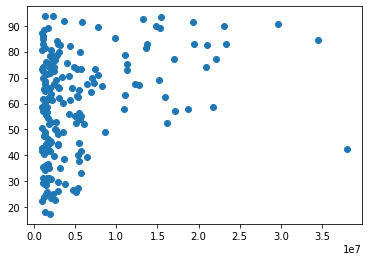

In [103]:
filtered = merge_health_crime_pollution_pop[merge_health_crime_pollution_pop['population'] > 1000000]
x = filtered['population']
y = filtered['pollution_index']

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x, y)
plt.show()


In [129]:
#https://ghsl.jrc.ec.europa.eu/ucdb2018visual.php
#https://ghsl.jrc.ec.europa.eu/index.php


eu_density_data = pd.read_csv(r'C:\Users\vw191\OneDrive - University of Bristol\Course\3rd year\Data Science\Project\Datastore\eu_density_data.csv')
eu_density_data

,ID_HDC_G0,QA2_1V,AREA,BBX_LATMN,BBX_LONMN,BBX_LATMX,BBX_LONMX,GCPNT_LAT,GCPNT_LON,CTR_MN_NM,...,EX_EQ19MMI,EX_EQ19_Q,EX_HW_IDX,SDG_LUE9015,SDG_A2G14,SDG_OS15MX,Unnamed: 160,Unnamed: 161,Unnamed: 162,Unnamed: 163
0,1,1,185,21.247683,-158.043016,21.422193,-157.730529,21.340678,-157.893497,United States,...,NaN,missing,NaN,0.074385,0.226415,56.41,NaN,NaN,NaN,NaN
1,2,2,42,-17.641184,-149.628088,-17.517631,-149.508018,-17.534103,-149.568053,French Polynesia,...,NaN,missing,NaN,0.128,0.284119,NaN,NaN,NaN,NaN,NaN
2,3,1,55,34.858517,-120.475511,34.989334,-120.389183,34.923123,-120.434372,United States,...,0.0,available,2.79174,0.48114,0.040129,23.64,NaN,NaN,NaN,NaN
3,4,1,48,36.582997,-121.952215,36.635743,-121.811816,36.607720,-121.882378,United States,...,0.0,available,NaN,0.44484,0.138683,42.17,NaN,NaN,NaN,NaN
4,5,1,60,34.388220,-119.853855,34.457831,-119.658413,34.427664,-119.743693,United States,...,0.0,available,4.25502,0.55676,0.061348,36.5,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13130,13131,1,70,-37.737746,176.104748,-37.631690,176.321892,-37.684080,176.183663,New Zealand,...,6.0,available,14.05370,0.23856,0.409358,54.71,NaN,NaN,NaN,NaN
13131,13132,0,3,-6.759222,155.679978,-6.743003,155.703239,-6.749761,155.693009,Papua New Guinea,...,8.0,available,1.81968,4.1398,1.000000,NaN,NaN,NaN,NaN,NaN
13132,13133,1,23,-9.454775,159.911539,-9.422255,160.006750,-9.436571,159.963101,Solomon Islands,...,8.0,available,1.90593,1.7473,0.824672,82.3,NaN,NaN,NaN,NaN
13133,13134,1,27,-22.304278,166.418428,-22.245962,166.483047,-22.277587,166.452136,New Caledonia,...,4.0,available,NaN,0.25381,0.080976,55.15,NaN,NaN,NaN,NaN


In [131]:
eu_density_data = eu_density_data[['UC_NM_MN' ,'XC_NM_LST' ,'XCTR_NBR', 'AREA', 'P15']]

In [162]:
eu_density_data.columns = ['City', 'Country', 'boundary_code', 'area_km2', 'population_2015']
eu_density_data = eu_density_data[eu_density_data['boundary_code'] == 1]

eu_density_data

,City,Country,boundary_code,area_km2,population_2015
0,Honolulu,United States,1,185,512853.66670
1,Papeete,French Polynesia,1,42,91521.12460
2,Santa Maria,United States,1,55,123181.28480
3,Monterey,United States,1,48,67772.28886
4,Santa Barbara,United States,1,60,114753.15020
...,...,...,...,...,...
13130,Tauranga,New Zealand,1,70,84583.72438
13131,Buin,Papua New Guinea,1,3,65360.36914
13132,Honiara,Solomon Islands,1,23,73669.68423
13133,Nouméa,New Caledonia,1,27,70631.79630


In [160]:
eu_density_data['Country'] = eu_density_data['Country'].astype(str)
eu_density_data['City'] = eu_density_data['City'].astype(str) 

merge_health_crime_pollution_pop['Country'] = merge_health_crime_pollution_pop['Country'].astype(str)
merge_health_crime_pollution_pop['City'] = merge_health_crime_pollution_pop['City'].astype(str) 

In [161]:
merge_health_crime_pollution_pop_eu = pd.merge(merge_health_crime_pollution_pop, eu_density_data, left_on=['City', 'Country'], right_on=['City', 'Country'])
merge_health_crime_pollution_pop_eu

,Rank_x,City,Country,health_care_index,health_care_exp_index,Rank_y,Crime_index,Safety_index,Rank,pollution_index,...,country,iso2,iso3,admin_name,capital,population,id,boundary_code,area_km2,population_2015
